In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATABASE_URL = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

total_data = pd.read_csv(DATABASE_URL)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
total_data.shape

(1338, 7)

In [10]:
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
total_data.iloc[1]

age                18
sex              male
bmi             33.77
children            1
smoker             no
region      southeast
charges     1725.5523
Name: 1, dtype: object

In [14]:
total_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:

total_data.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
# ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

total_data['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [19]:
# ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

total_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [20]:
 # ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

total_data['bmi'].value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

In [21]:
total_data['children'].value_counts()


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [22]:
 # ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

total_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [23]:
 # ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

total_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [24]:
 # ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

total_data['charges'].value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

In [25]:
total_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [33]:
total_data[total_data.duplicated()]

#trying to print the rows where they are duplicated but I am only seeing one and not sure if this one is duplicated or not


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [35]:
#printed the rows where charges == 1639.5631 since that is the one in the duplicate above and got 2 rows. need to delete one of these?

specific_charge_rows = total_data[total_data['charges'] == 1639.5631]
print(specific_charge_rows)

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [37]:
#just checked with bmi but not really relevant

specific_bmi_rows = total_data[total_data['bmi'] == 30.59]
print(specific_bmi_rows)

      age     sex    bmi  children smoker     region      charges
195    19    male  30.59         0     no  northwest   1639.56310
423    25    male  30.59         0     no  northeast   2727.39510
526    19  female  30.59         2     no  northwest  24059.68019
567    41    male  30.59         2     no  northwest   7256.72310
581    19    male  30.59         0     no  northwest   1639.56310
983    27  female  30.59         1     no  northeast  16796.41194
1158   20  female  30.59         0     no  northeast   2459.72010


In [38]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
#checking to make sure the duplicate was removed

specific_charge_rows = total_data[total_data['charges'] == 1639.5631]
print(specific_charge_rows)


     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631


,age,sex,bmi,children,smoker,region,charges


In [44]:
#checking to make sure the duplicate was removed
total_data.duplicated().sum()

0

In [48]:
total_data.iloc[580]

age                 59
sex               male
bmi              25.46
children             1
smoker              no
region       northeast
charges     12913.9924
Name: 580, dtype: object

In [50]:
#checking to make sure it only removed 1
total_data.shape

(1337, 7)

In [55]:
# Factorize each column in the data_set

columns_to_factorize = ['sex', 'smoker', 'region']
factorized_columns = []
for column in columns_to_factorize:
    factorized_column, _ = pd.factorize(total_data[column])
    total_data[column + '_factorized'] = factorized_column
    factorized_columns.append(column + '_factorized')
    total_data.drop(column, axis=1, inplace=True)

total_data.head()

,age,bmi,children,charges,sex_factorized,smoker_factorized,region_factorized
0,19,27.900,0,16884.92400,0,0,0
1,18,33.770,1,1725.55230,1,1,1
2,28,33.000,3,4449.46200,1,1,1
3,33,22.705,0,21984.47061,1,1,2
4,32,28.880,0,3866.85520,1,1,2


In [56]:
train_data = total_data
test_data = total_data

train_data.head()

,age,bmi,children,charges,sex_factorized,smoker_factorized,region_factorized
0,19,27.900,0,16884.92400,0,0,0
1,18,33.770,1,1725.55230,1,1,1
2,28,33.000,3,4449.46200,1,1,1
3,33,22.705,0,21984.47061,1,1,2
4,32,28.880,0,3866.85520,1,1,2


In [57]:
test_data.head()

,age,bmi,children,charges,sex_factorized,smoker_factorized,region_factorized
0,19,27.900,0,16884.92400,0,0,0
1,18,33.770,1,1725.55230,1,1,1
2,28,33.000,3,4449.46200,1,1,1
3,33,22.705,0,21984.47061,1,1,2
4,32,28.880,0,3866.85520,1,1,2


In [62]:
total_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_factorized',
       'smoker_factorized', 'region_factorized'],
      dtype='object')

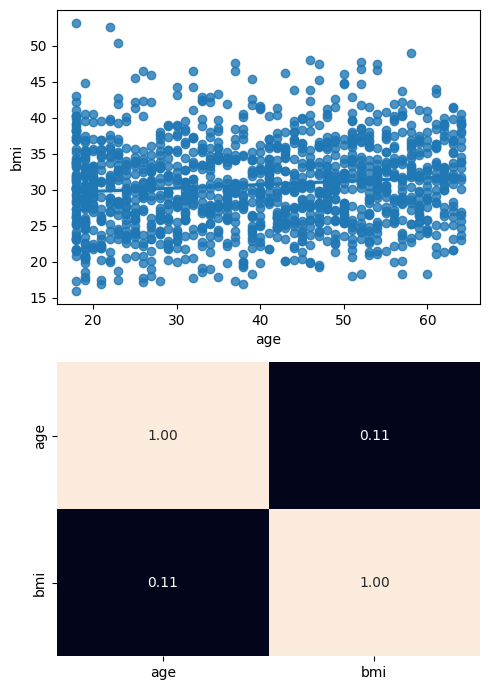

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (5, 7))
# total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0], data = total_data, x = "age", y = "bmi")
sns.heatmap(total_data[["age", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

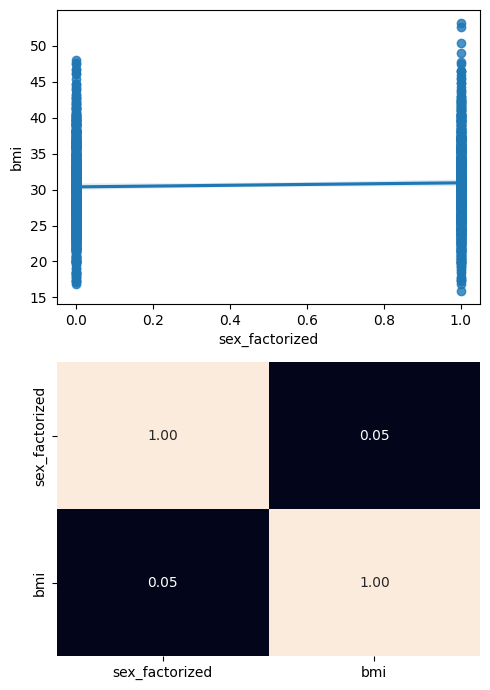

In [61]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

sns.regplot(ax = axis[0], data = total_data, x = "sex_factorized", y = "bmi")
sns.heatmap(total_data[["sex_factorized", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

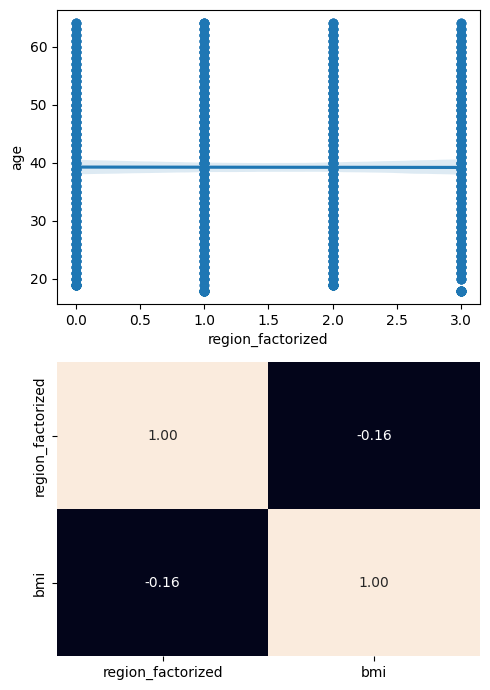

In [63]:
 # (['age', 'bmi', 'children', 'charges', 'sex_factorized', 'smoker_factorized', 'region_factorized'],

fig, axis = plt.subplots(2, 1, figsize = (5, 7))

sns.regplot(ax = axis[0], data = total_data, x = "region_factorized", y = "age")
sns.heatmap(total_data[["region_factorized", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

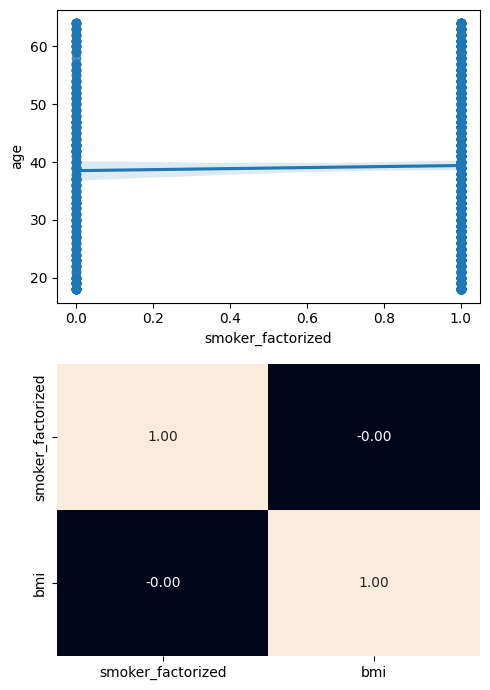

In [64]:
 # (['age', 'bmi', 'children', 'charges', 'sex_factorized', 'smoker_factorized', 'region_factorized'],

fig, axis = plt.subplots(2, 1, figsize = (5, 7))

sns.regplot(ax = axis[0], data = total_data, x = "smoker_factorized", y = "age")
sns.heatmap(total_data[["smoker_factorized", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

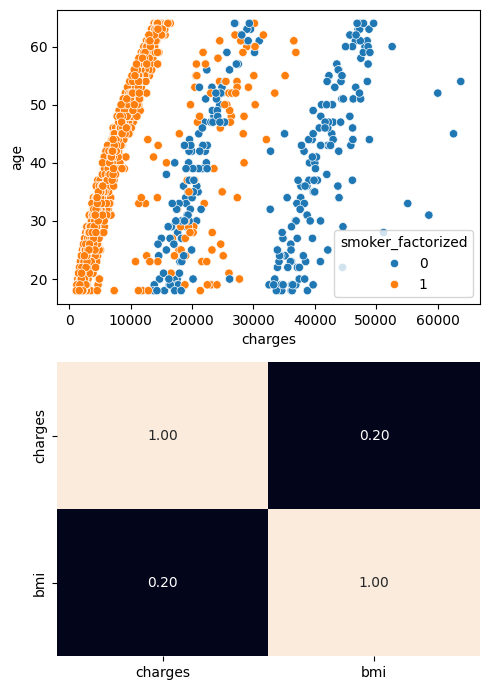

In [88]:
 # (['age', 'bmi', 'children', 'charges', 'sex_factorized', 'smoker_factorized', 'region_factorized'],

fig, axis = plt.subplots(2, 1, figsize = (5, 7))

sns.scatterplot(ax = axis[0], data = total_data, x = "charges", y = "age", hue ="smoker_factorized")
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

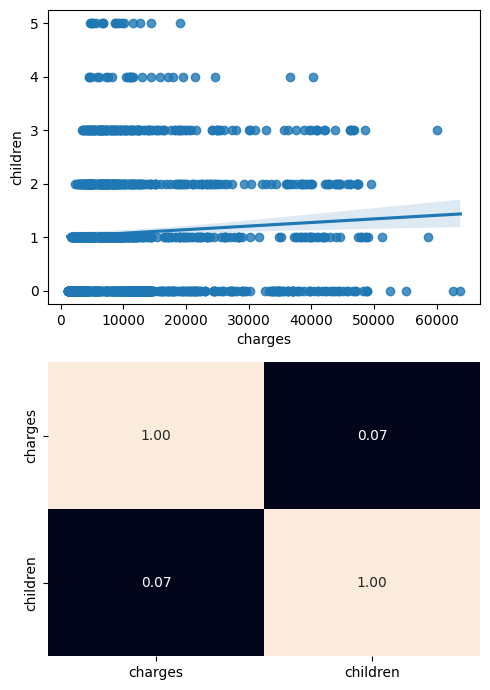

In [67]:
 # (['age', 'bmi', 'children', 'charges', 'sex_factorized', 'smoker_factorized', 'region_factorized'],

fig, axis = plt.subplots(2, 1, figsize = (5, 7))

sns.regplot(ax = axis[0], data = total_data, x = "charges", y = "children")
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

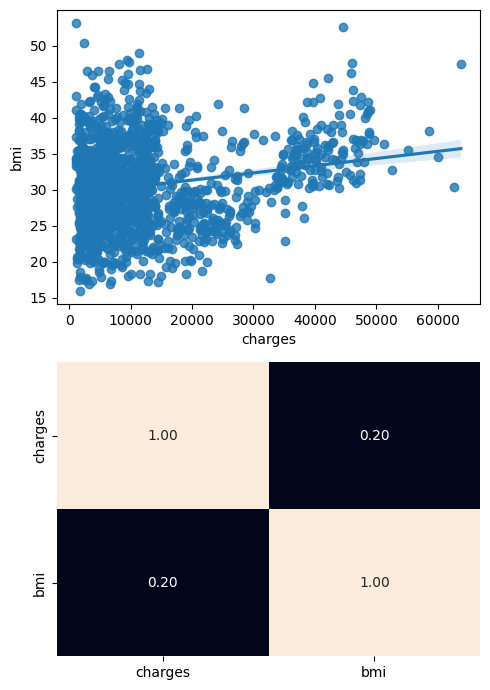

In [69]:
 # (['age', 'bmi', 'children', 'charges', 'sex_factorized', 'smoker_factorized', 'region_factorized'],

fig, axis = plt.subplots(2, 1, figsize = (5, 7))

sns.regplot(ax = axis[0], data = total_data, x = "charges", y = "bmi")
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

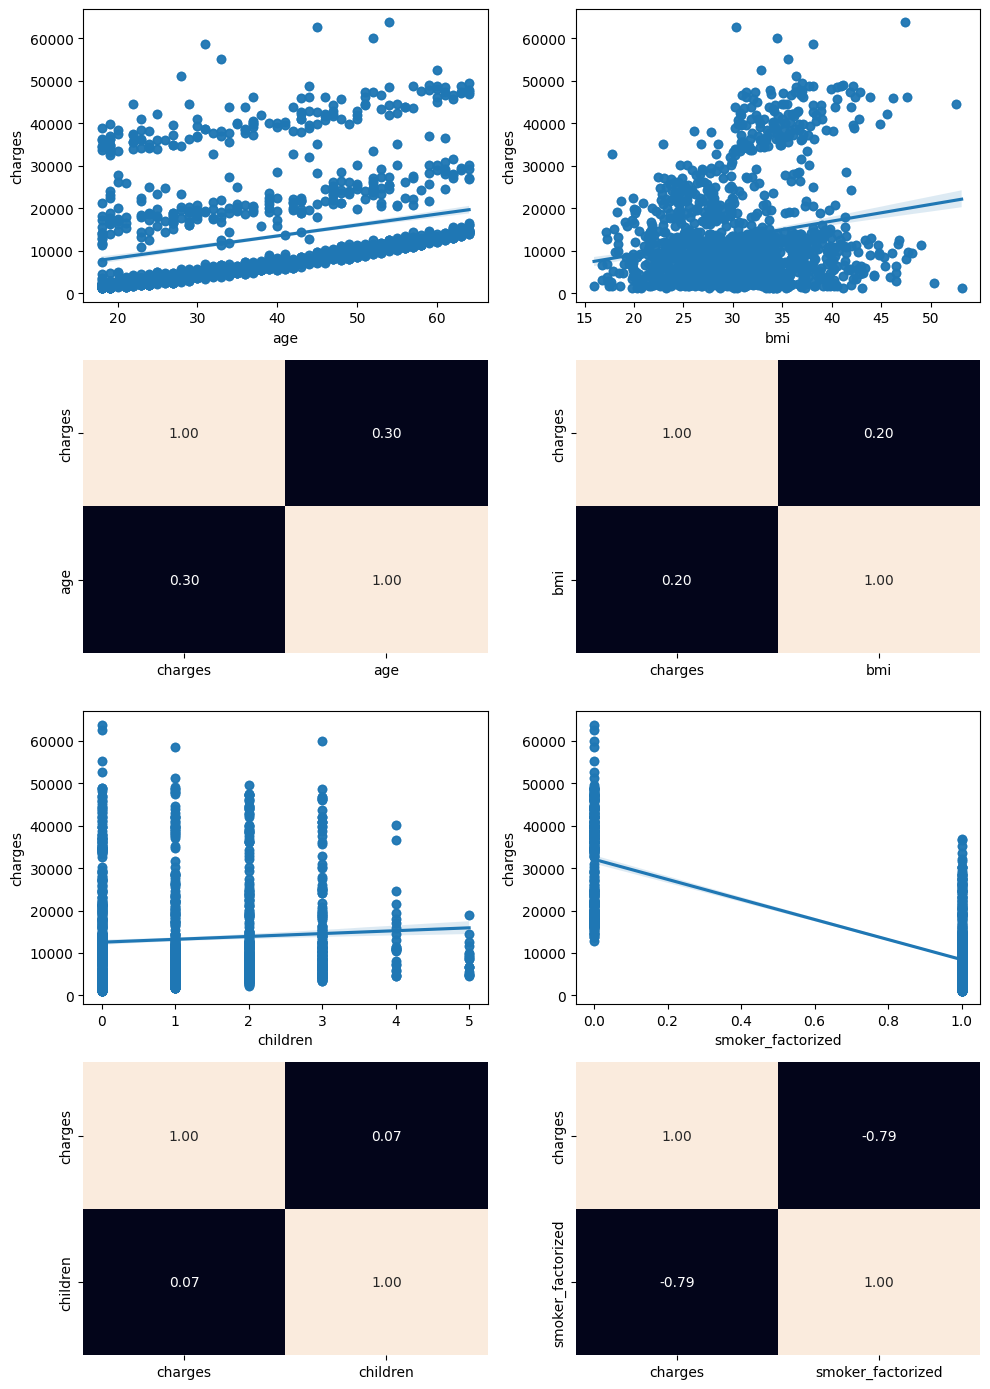

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker_factorized", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_factorized"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [70]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [71]:
X_train

,age,bmi,children,sex_factorized,smoker_factorized,region_factorized
0,19,27.900,0,0,0,0
1,18,33.770,1,1,1,1
2,28,33.000,3,1,1,1
3,33,22.705,0,1,1,2
4,32,28.880,0,1,1,2
...,...,...,...,...,...,...
1332,50,30.970,3,1,1,2
1333,18,31.920,0,0,1,3
1334,18,36.850,0,0,1,1
1335,21,25.800,0,0,1,0


In [72]:
y_train

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1332    10600.54830
1333     2205.98080
1334     1629.83350
1335     2007.94500
1336    29141.36030
Name: charges, Length: 1337, dtype: float64

In [73]:
X_test

,age,bmi,children,sex_factorized,smoker_factorized,region_factorized
0,19,27.900,0,0,0,0
1,18,33.770,1,1,1,1
2,28,33.000,3,1,1,1
3,33,22.705,0,1,1,2
4,32,28.880,0,1,1,2
...,...,...,...,...,...,...
1332,50,30.970,3,1,1,2
1333,18,31.920,0,0,1,3
1334,18,36.850,0,0,1,1
1335,21,25.800,0,0,1,0


In [74]:
y_test

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1332    10600.54830
1333     2205.98080
1334     1629.83350
1335     2007.94500
1336    29141.36030
Name: charges, Length: 1337, dtype: float64

In [75]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:


print(f"Intercept (a): {model.intercept_}")

print(f"Coefficients (b): {model.coef_}")

Intercept (a): 10945.668004973353
Coefficients (b): [   257.20319637    332.59571503    478.77165047   -129.40086662
 -23819.1501015     354.00967356]


In [93]:
a = model.intercept_
b = model.coef_

print(a)
print(b)

10945.668004973353
[   257.20319637    332.59571503    478.77165047   -129.40086662
 -23819.1501015     354.00967356]


In [77]:
y_pred = model.predict(X_test)
y_pred

array([25111.94918534,  3691.31319209,  6964.78975616, ...,
        4366.33721054,  1108.75447502, 37011.63976662])

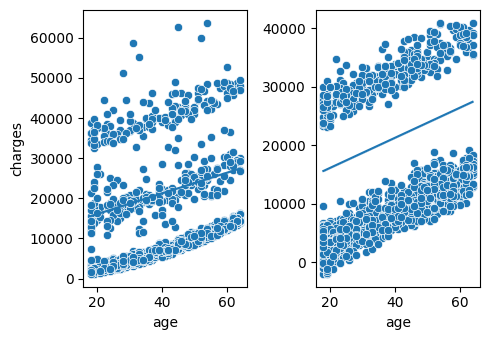

In [95]:
fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
# total_data = pd.concat([train_data, test_data])

# We use the parameters adjusted in the training to draw the regression line in the plots
regression_equation = lambda x: a+257.20319637 * x

sns.scatterplot(ax = axis[0], data = test_data, x = "age", y = "charges")
sns.lineplot(ax = axis[0], x = test_data["age"], y = regression_equation(test_data["age"]))
sns.scatterplot(ax = axis[1], x = test_data["age"], y = y_pred)
sns.lineplot(ax = axis[1], x = test_data["age"], y = regression_equation(test_data["age"])).set(ylabel = None)

plt.tight_layout()

plt.show()

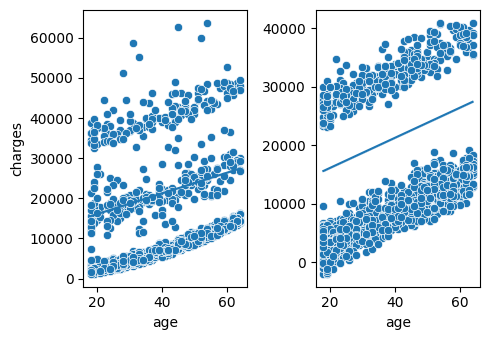

In [96]:
fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
# total_data = pd.concat([train_data, test_data])

# We use the parameters adjusted in the training to draw the regression line in the plots
regression_equation = lambda x: a + 257.20319637 * x

sns.scatterplot(ax = axis[0], data = test_data, x = "age", y = "charges")
sns.lineplot(ax = axis[0], x = test_data["age"], y = regression_equation(test_data["age"]))
sns.scatterplot(ax = axis[1], x = test_data["age"], y = y_pred)
sns.lineplot(ax = axis[1], x = test_data["age"], y = regression_equation(test_data["age"])).set(ylabel = None)

plt.tight_layout()

plt.show()

In [83]:
"""To calculate the effectiveness of the model we will use the mean squared error (MSE) and the coefficient of determination (), one of the most popular metrics:"""


from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

"""The lower the RMSE value, the better the model. A perfect model (a hypothetical model that can always predict the exact expected value) would have a value for this metric of 0. We observe that there is a slippage of 37 million, so we could understand that it is very bad. If we rely on the 
 value, we observe that it is 95%, a very high value, then 95% of the data are explained by the model, so it is satisfactory."""

Mean squared error: 36554035.094493076
Coefficient of determination: 0.7505714331710207


'The lower the RMSE value, the better the model. A perfect model (a hypothetical model that can always predict the exact expected value) would have a value for this metric of 0. We observe that there is a slippage of 37 million, so we could understand that it is very bad. If we rely on the \n value, we observe that it is 95%, a very high value, then 95% of the data are explained by the model, so it is satisfactory.'